In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

<AxesSubplot:>

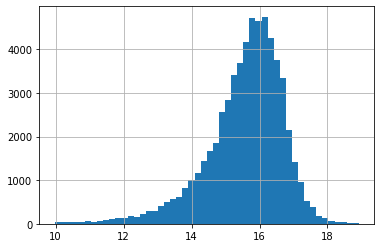

In [2]:
df0 = pd.read_csv('./data/processed/population_gt_1M.csv')
df0.per_square_meter_price.hist(bins=50)

In [3]:
realty_type_categories = ['realty_type_10', 'realty_type_100', 'realty_type_110']
points_types = ['amenity_points', 'building_points', 'catering_points', 'crossing_points', 'culture_points',
                'finance_points', 'healthcare_points', 'historic_points', 'hotels_points', 'leisure_points',
                'offices_points', 'shops_points']

columns = ['per_square_meter_price', 'city', 'osm_city_closest_dist', 'osm_city_nearest_population'] + realty_type_categories + points_types

df = df0[columns]

target_col = 'per_square_meter_price'
columns_to_scale = ['city', 'osm_city_closest_dist', 'osm_city_nearest_population'] + points_types
df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])

df.head(100)

C:\Users\super\AppData\Local\Temp\ipykernel_3288\1589001193.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])


,per_square_meter_price,city,osm_city_closest_dist,osm_city_nearest_population,realty_type_10,realty_type_100,realty_type_110,amenity_points,building_points,catering_points,crossing_points,culture_points,finance_points,healthcare_points,historic_points,hotels_points,leisure_points,offices_points,shops_points
0,15.017446,-0.505778,-0.544344,-0.319977,1.0,0.0,0.0,0.490392,-0.122150,0.411998,1.174679,-0.301143,1.868990,0.578601,0.251483,-0.485687,0.257660,0.945845,0.343440
1,16.953762,-0.478759,-0.346137,0.773664,1.0,0.0,0.0,-0.280243,-0.164719,-0.269883,0.636565,0.012840,-0.402637,0.330790,-0.480057,-0.565112,-0.555075,-0.111126,-0.144127
2,15.701783,-0.465250,-0.124890,-0.484999,0.0,1.0,0.0,-0.458834,-0.171813,-0.524561,-0.380601,-0.443863,-0.609149,-0.412642,-0.480057,-0.485687,-0.507267,-0.626721,-0.328115
3,16.173566,-0.438231,-0.236165,-0.679189,1.0,0.0,0.0,0.796200,-0.171813,0.600953,-0.820279,-0.443863,-0.284631,0.082979,-0.283104,-0.485687,-0.459459,-0.652501,1.507161
4,15.063250,-0.370684,2.071921,0.250085,0.0,0.0,1.0,-0.999502,-0.171813,-0.631362,-1.043399,-0.443863,-0.697654,-0.957826,-0.480057,-0.565112,-0.794114,-0.729840,-1.068665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.947375,-0.262608,-0.234291,-0.244348,1.0,0.0,0.0,-0.549353,-0.171813,-0.467053,-0.715281,-0.443863,-0.402637,-0.511767,0.138939,-0.485687,-0.794114,-0.343144,-0.558099
96,15.743103,-0.357174,-0.033775,-0.438670,0.0,0.0,1.0,-0.395226,-0.171813,-0.565639,-0.636533,-0.443863,-0.697654,-0.214394,-0.480057,-0.326836,0.974778,-0.446263,-0.249920
97,16.187371,-0.262608,-0.611464,-0.244348,0.0,0.0,1.0,1.598638,-0.171813,1.430712,1.771854,2.524708,0.924937,0.975098,2.389832,-0.009135,2.169976,1.693459,1.240379
98,16.017446,-0.357174,-0.138343,-0.438670,1.0,0.0,0.0,-0.299814,-0.171813,-0.319175,0.223137,-0.443863,-0.078119,0.429915,-0.311240,-0.088560,-0.268227,-0.368923,-0.213123


In [4]:
mape_mean = 0
baseline_mean = 0
n = 50
for _ in range(n):
       train, test = train_test_split(df, test_size=0.5)

       baseline = pd.Series([train.per_square_meter_price.mean()] * len(test))

       train_x, train_y = train.drop(target_col, axis=1), train[target_col]
       test_x, test_y = test.drop(target_col, axis=1), test[target_col]

       model = LinearRegression()
       model.fit(train_x, train_y)

       pred = model.predict(test_x)
       mape_mean += mean_absolute_percentage_error(2**test_y, 2**pred)
       baseline_mean += mean_absolute_percentage_error(2 ** test_y, 2 ** baseline)
print(mape_mean / n)
print(baseline_mean / n)

0.8161135637166731
0.9353897212811146


### Forecasting

In [5]:
df0 = pd.read_csv('./data/test/population_gt_1M.csv')
df0.set_index('Unnamed: 0', inplace=True)
df0.index.name='id'
print(df0.head(100))
print(df0.shape)

     city  floor          id        lat        lng  osm_city_closest_dist  \
id                                                                          
2       2    1.0  COL_132045  57.969273  56.152996               7.507584   
11     10    NaN  COL_136461  56.827890  60.587486               1.775469   
19     16    NaN  COL_218874  56.359160  43.864070               9.244353   
25     19    NaN  COL_101246  59.906307  29.066545              69.756052   
35     24    NaN  COL_274779  54.762985  55.995296               5.119798   
..    ...    ...         ...        ...        ...                    ...   
337    42    NaN  COL_217323  55.031635  82.935990               0.885180   
340    51    NaN  COL_177017  56.054040  92.957140               7.256067   
342    24    NaN  COL_147726  54.673462  56.087692              10.748511   
346    36    1.0  COL_165088  47.225647  39.741226               2.300941   
348    24    NaN  COL_219434  54.742493  55.997310               3.679824   

In [6]:
columns.remove('per_square_meter_price') if 'per_square_meter_price' in columns else ''
df = df0[columns]

columns_to_scale = ['city', 'osm_city_closest_dist', 'osm_city_nearest_population'] + points_types
df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])

print(df.head(100))
print(df.shape)

         city  osm_city_closest_dist  osm_city_nearest_population  \
id                                                                  
2   -0.357748              -0.158850                    -0.508461   
11  -0.335507              -0.350401                     0.273311   
19  -0.318826              -0.100813                    -0.136255   
25  -0.310485               1.921313                     7.672282   
35  -0.296585              -0.238643                    -0.369687   
..        ...                    ...                          ...   
337 -0.246542              -0.380152                     0.569745   
340 -0.221521              -0.167255                    -0.433034   
342 -0.296585              -0.050548                    -0.369687   
346 -0.263223              -0.332841                    -0.396124   
348 -0.296585              -0.286763                    -0.369687   

     realty_type_10  realty_type_100  realty_type_110  amenity_points  \
id                           

C:\Users\super\AppData\Local\Temp\ipykernel_3288\887400710.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_scale] = StandardScaler().fit_transform(df[columns_to_scale])


In [7]:
pred = model.predict(df)

res = pd.DataFrame(data=pred, columns=[target_col])
res['id'] = df0.index.tolist()
res.set_index('id', inplace=True)

print(res.head(100))
res.to_csv('./data/forecast/population_gt_1M.csv')

     per_square_meter_price
id                         
2                 15.424194
11                16.596680
19                15.546143
25                16.619873
35                15.201294
..                      ...
337               15.719238
340               15.227661
342               15.473877
346               15.636841
348               15.515991

[100 rows x 1 columns]
